In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

In [2]:
# Importing the csv
climate_essay_df = pd.read_csv('data_noID.csv')

# How big is this dataframe
climate_essay_df.shape

(1793, 104)

In [3]:
subsetted_df = climate_essay_df[climate_essay_df['trt1'] == 1]
subsetted_df = subsetted_df[['trt1', 'don', 'essay']]
subsetted_df = subsetted_df.reset_index(drop = True)
subsetted_df.shape

(589, 3)

In [4]:
subsetted_df['big_donator'] = (subsetted_df['don'] > 8.5)
subsetted_df['big_donator'] = subsetted_df['big_donator'].astype(int)
subsetted_df.head()

,trt1,don,essay,big_donator
0,1,15.0,"Dear Adelyn, \n Today is January 7, 2015. I kn...",1
1,1,0.0,To whom it may concern in 2050:\n\nThis is 201...,0
2,1,19.0,"Dear son,\n This is your mother from 2015 w...",1
3,1,15.0,"Dear J-Swag,\n I want you to know how much I l...",1
4,1,0.0,"Dear Kailey,\nYou will be reading this in the ...",0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
word_counter = CountVectorizer()

essays = subsetted_df['essay'].values

bag_of_words = word_counter.fit_transform(essays)

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tSNE is similar to PCA in that it reduces dimensionality of your data, however they are different. Notably, PCA outputs a function to transform new data, while tSNE does not. Additionally, they reduce dimensions in different ways: PCA reduces in a way that maintains the variability of the original data, while tSNE reduces in a way that maintains distances between points. Additionally tSNE is a nonlinear dimensionality reduction, where PCA is not.

In [8]:
dim_reduction = TSNE()
tSNE_transformed = dim_reduction.fit_transform(X = bag_of_words.toarray())
tSNE_transformed.shape

(589, 2)

In [9]:
from sklearn.svm import SVC

In [10]:
svm_model = SVC(kernel = 'linear')

Ys = subsetted_df['big_donator'].values

svm_model.fit(X = tSNE_transformed,
              y = Ys)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

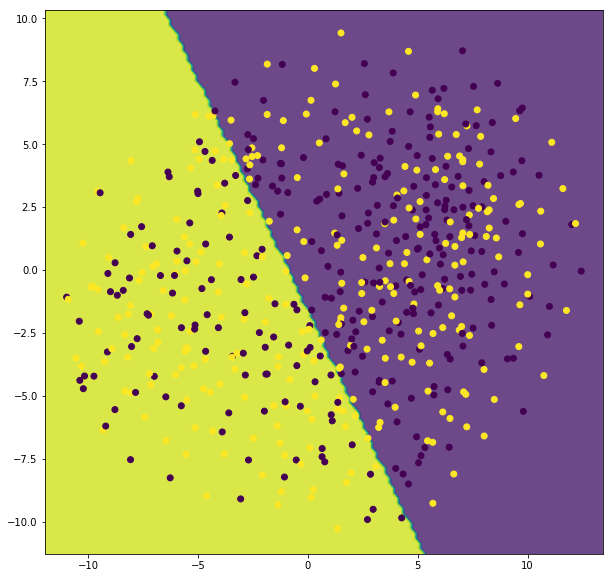

In [11]:
h = 0.2
x_min, x_max = tSNE_transformed[:,0].min() - 1, tSNE_transformed[:, 0].max() + 1
y_min, y_max = tSNE_transformed[:,1].min() - 1, tSNE_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.viridis, alpha=0.8)
plt.scatter(tSNE_transformed[:,0],tSNE_transformed[:,1],c=Ys, cmap = plt.cm.viridis)
plt.show()

In [12]:
predicted_Ys = svm_model.predict(tSNE_transformed)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
accuracy_score(Ys, predicted_Ys)

0.567062818336163

In [15]:
confusion_matrix(Ys, predicted_Ys)

array([[204, 100],
       [155, 130]])

In [16]:
def train_SVM(data, dim_reduction, kernel, new_dim):
    
    if dim_reduction == 'tSNE':
        dim_reduction = TSNE(n_components = new_dim)
        
    elif dim_reduction == 'PCA':
        dim_reduction = PCA(n_components = new_dim)
        
    reduced_data = dim_reduction.fit_transform(data)
    
    svm_model = SVC(kernel = kernel)
    
    svm_model.fit(X = reduced_data,
                  y = Ys)
    
    h = 0.2
    x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))

    # create decision boundary plot
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.viridis, alpha=0.8)
    plt.scatter(tSNE_transformed[:,0],tSNE_transformed[:,1],c=Ys, cmap = plt.cm.viridis)
    plt.show()
    
    return(svm_model, reduced_data)

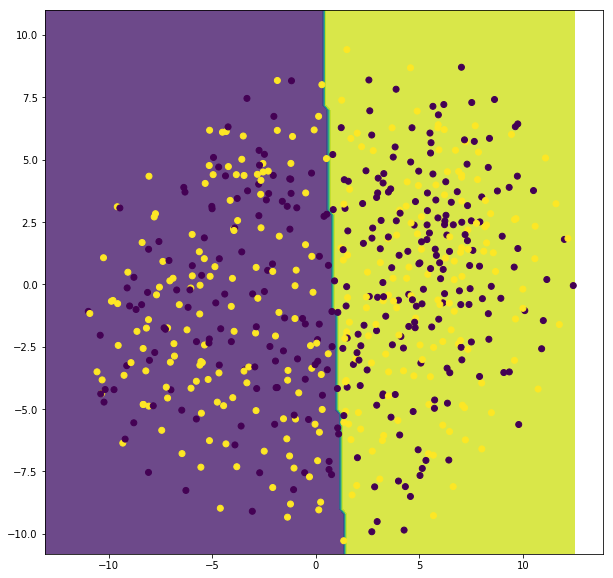

In [17]:
linear_tSNE_SVM, tSNE_data = train_SVM(bag_of_words.todense(), 'tSNE', 'linear', 2)

In [18]:
predicted_Ys = linear_tSNE_SVM.predict(tSNE_data)
accuracy_score(Ys, predicted_Ys)

0.565365025466893

In [19]:
confusion_matrix(Ys, predicted_Ys)

array([[201, 103],
       [153, 132]])

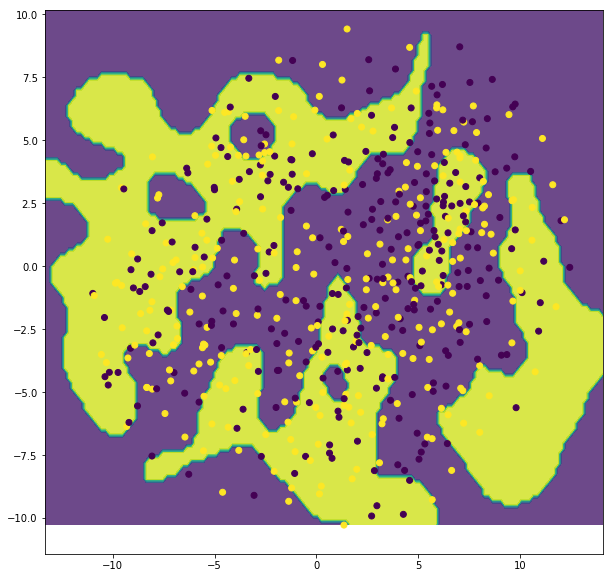

In [20]:
rbf_tSNE_SVM, tSNE_data = train_SVM(bag_of_words.todense(), 'tSNE', 'rbf', 2)

In [21]:
predicted_Ys = rbf_tSNE_SVM.predict(tSNE_data)
accuracy_score(Ys, predicted_Ys)

0.6994906621392191

In [22]:
confusion_matrix(Ys, predicted_Ys)

array([[222,  82],
       [ 95, 190]])

<br><br><br>

In [23]:
from sklearn import tree

In [24]:
dec_tree = tree.DecisionTreeClassifier()

In [25]:
dec_tree.fit(X=tSNE_data, y=Ys)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
predicted_Ys = dec_tree.predict(tSNE_data)
accuracy_score(Ys, predicted_Ys)

1.0

In [27]:
confusion_matrix(Ys, predicted_Ys)

array([[304,   0],
       [  0, 285]])

<br><br><br>

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
random_forest = RandomForestClassifier()
random_forest.fit(X=tSNE_data, y=Ys)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
predicted_Ys = random_forest.predict(tSNE_data)
accuracy_score(Ys, predicted_Ys)

0.9541595925297114

In [31]:
confusion_matrix(Ys, predicted_Ys)

array([[292,  12],
       [ 15, 270]])

<br><br><br>